IS 675: Data Mining
Summer 2019
## Homework Assignment 7 (Due July, 2182019, midnight EST)



1. Import appropriate libraries to cluster iris data using k-means. (10 points)
2. Load the iris data: first 4 attributes into X and the class attribute into y. (10 points)
3. Create 3 clusters using K-means algorithm. (10 points)
4. Save the centroids of each cluster into a variable. (10 points)
5. Plot (2D) the data points with color-coded clusters along with the centroids using any two features. Which two features show the best cluster separation? (30 points)
6. Calculate the silhouette coefficients. (10 points)
7. Assuming that the data is ordered by class labels, print the average silhouette coefficient for each class. (20 points)


## 1. Import appropriate libraries to cluster iris data using k-means. (10 points)

In [1]:
import numpy as np
import itertools
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.metrics.cluster import silhouette_score,silhouette_samples
import matplotlib.pyplot as plt

## 2. Load the iris data: first 4 attributes into X and the class attribute into y. (10 points)

In [2]:
iris_dataset = datasets.load_iris()

X = iris_dataset.data[:,:4]
y = iris_dataset.target
features = iris_dataset.feature_names[:4]
print('Data Shape:\t', X.shape, '\nTarget Shape:\t', y.shape, '\nClasses:\t', features)

Data Shape:	 (150, 4) 
Target Shape:	 (150,) 
Classes:	 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


## 3. Create 3 clusters using K-means algorithm. (10 points)

In [3]:
kmeans_model = KMeans(n_clusters=3)
kmeans_model.fit(X, y)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

## 4. Save the centroids of each cluster into a variable. (10 points)

In [4]:
centroids = kmeans_model.cluster_centers_
labels = kmeans_model.labels_
centroids


array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [5]:
centroids[:,0]

array([5.9016129, 5.006    , 6.85     ])

## 5. Plot (2D) the data points with color-coded clusters along with the centroids using any two features. Which two features show the best cluster separation? (30 points)

In [6]:
features_tuples = []
for i in range(len(X[1])):
    features_tuples.append((features[i], [x[i] for x in X], i))

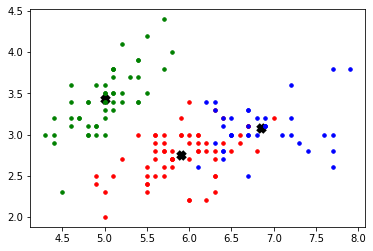

In [7]:
colors = ["r.","g.","b.","c.","y.","k."]

for i in range(len(X)):
    plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize = 7)
plt.scatter(centroids[:,0], centroids[:,1], marker='x', color='k', s=50, linewidth=5)
plt.show()

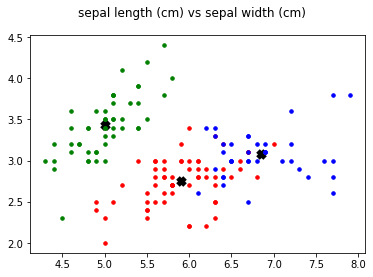

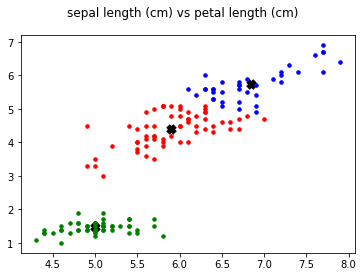

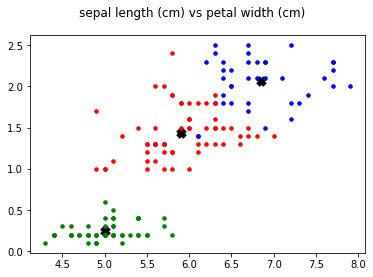

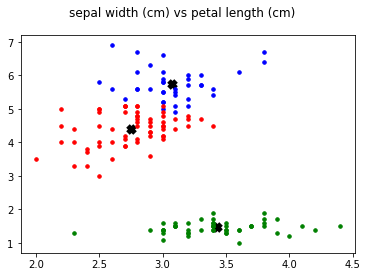

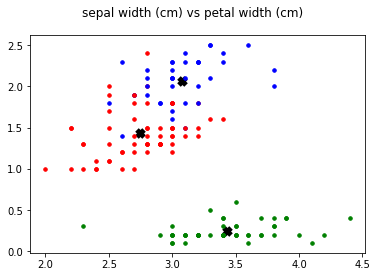

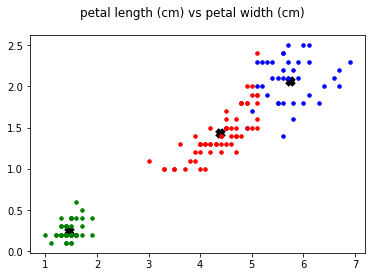

In [8]:
def plot__kmeans_scatter_in_2d(data_tuple):
    colors = ["r.","g.","b.","c.","y.","k."]
    
    first_feature, first_data, first_n = data_tuple[0]
    secnd_feature, secnd_data, secnd_n = data_tuple[1]

    fig = plt.figure()
    fig.suptitle(f'{first_feature} vs {secnd_feature}')

    for i in range(len(first_data)):
        plt.plot(first_data[i], secnd_data[i], colors[labels[i]], markersize = 7)
    plt.scatter(centroids[:,first_n], centroids[:,secnd_n], marker='x', color='k', s=50, linewidth=5)
    plt.show()


pairs = itertools.combinations(features_tuples, 2)

for pair in pairs:
    plot__kmeans_scatter_in_2d(pair)

From visually inspecting the graphs above it seems that sepal length and sepal width have the best seperation between clusters. 

## 6. Calculate the silhouette coefficients. (10 points)

In [9]:
print(f"silhouette_score: {silhouette_score(X, kmeans_model.labels_, metric='sqeuclidean')}")

silhouette_samples_array = silhouette_samples(X, labels, metric='sqeuclidean')

silhouette_score: 0.7356596054332232


## 7. Assuming that the data is ordered by class labels, print the average silhouette coefficient for each class. (20 points)

In [10]:
samples_dict = {x:[] for x in [0,1,2]}
for coef, sample in zip(silhouette_samples_array, labels):
    samples_dict[sample].append(coef)
    
for label, values in samples_dict.items():
    print(f'Label {label} averages: {np.mean(values)}')

Label 0 averages: 0.6109234729816864
Label 1 averages: 0.9498651889097479
Label 2 averages: 0.6573270011745136
